![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit can take in any dataset which means it works very well with the software and APIs from any other provider let is be Intrinio, OpenBB, Yahoo Finance, Quandl, etc. For this illustration, I have collected custom statements and have imported them as a CSV file but as you can imagine this would also work with direct API calls. This dataset is obtained from Yahoo Finance, which can be collected via `yfinance`. Note that the `yfinance` library is not part of the Finance Toolkit and needs to be installed separately.

In [1]:
import pandas as pd
from financetoolkit import Toolkit

First, let's read in the custom dataset obtained from Yahoo Finance.

In [2]:
# Balance Sheet Statements
tsla_balance = pd.read_csv("external_datasets/TSLA_balance.csv", index_col=0)
googl_balance = pd.read_csv("external_datasets/GOOGL_balance.csv", index_col=0)

# Income Statements
tsla_income = pd.read_csv("external_datasets/TSLA_income.csv", index_col=0)
googl_income = pd.read_csv("external_datasets/GOOGL_income.csv", index_col=0)

# Cash Flow Statements
tsla_cash = pd.read_csv("external_datasets/TSLA_cash.csv", index_col=0)
googl_cash = pd.read_csv("external_datasets/GOOGL_cash.csv", index_col=0)

# Show one of the datasets
tsla_income

,ttm,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Breakdown,,,,,
Total revenue,9.402800e+10,8.146200e+10,5.382300e+10,3.153600e+10,2.457800e+10
Cost of revenue,7.382500e+10,6.060900e+10,4.021700e+10,2.490600e+10,2.050900e+10
Gross profit,2.020300e+10,2.085300e+10,1.360600e+10,6.630000e+09,4.069000e+09
Research development,3.257000e+09,3.075000e+09,2.593000e+09,1.491000e+09,1.343000e+09
Selling general and administrative,4.260000e+09,3.946000e+09,4.517000e+09,3.145000e+09,2.646000e+09
Total operating expenses,7.517000e+09,7.021000e+09,7.110000e+09,4.636000e+09,3.989000e+09
Operating income or loss,1.268600e+10,1.383200e+10,6.496000e+09,1.994000e+09,8.000000e+07
Interest expense,1.430000e+08,1.910000e+08,3.710000e+08,7.480000e+08,6.850000e+08
Total other income/expenses net,1.190000e+08,-2.190000e+08,1.620000e+08,-1.220000e+08,-1.040000e+08


Then, it's time to acquire the normalization files via the Toolkit to be used to normalize the results.

In [3]:
Toolkit("TSLA").get_normalization_files()

Files are being saved to /Users/jeroenbouma/Downloads. Please see the following: https://www.jeroenbouma.com/projects/financetoolkit/external-datasets to understand how to work with these files. In essence, all it requires is to match up the rows in your dataframe with the normalization format.


With this information, by copying over each name as defined by Yahoo Finance for the balance, income and cash flow statements as also defined above, the normalisation files can be filled. The result can be found within the `examples/external_datasets` folder of the project as found [here](https://github.com/JerBouma/FinanceToolkit/tree/main/examples).

The way you should be filling these sheets is by looking at the index names of the DataFrame depicted above and placing the name at the correct position of the first column of the CSV (Column A). As an example the name `Total revenue` can be matched in the `income.csv` with `Revenue`. Do not change the names in Column B since the FinanceToolkit is dependent on those. So for the `income.csv` this will look like:

|Income|Generic|
|:----|:----|
|Total revenue|Revenue|
|Cost of revenue|Cost of Goods Sold|
|Gross profit|Gross Profit|
| |Gross Profit Ratio|
|Research development|Research and Development Expenses|
| |General and Administrative Expenses|
| |Selling and Marketing Expenses|
|Selling general and administrative|Selling, General and Administrative Expenses|
| |Other Expenses|
|Total operating expenses|Operating Expenses|
| |Cost and Expenses|
| |Interest Income|
|Interest expense|Interest Expense|
| |Depreciation and Amortization|
|EBITDA|EBITDA|
| |EBITDA Ratio|
|Operating income or loss|Operating Income|
| |Operating Income Ratio|
|Total other income/expenses net|Total Other Income|
|Income before tax|Income Before Tax|
| |Income Before Tax Ratio|
|Income tax expense|Income Tax Expense|
|Net income|Net Income|
| |Net Income Ratio|
|Basic EPS|EPS|
|Diluted EPS|EPS Diluted|
|Basic average shares|Weighted Average Shares|
|Diluted average shares|Weighted Average Shares Diluted|

As you can see some are not filled. This is because the Yahoo Finance source doesn't have data on each. This is fine, to some extend, as any calculations that are not possible because of this will simply be excluded.

Now it's time to convert each dataset in the right format.

In [4]:
from financetoolkit import helpers

balance_sheets = helpers.combine_dataframes(
    {
        "TSLA": tsla_balance,
        "GOOGL": googl_balance,
    },
)
income_statements = helpers.combine_dataframes(
    {
        "TSLA": tsla_income,
        "GOOGL": googl_income,
    },
)
cash_flow_statements = helpers.combine_dataframes(
    {"TSLA": tsla_cash, "GOOGL": googl_cash},
)

# The TTM column is dropped as it contains only a portion of this year
income_statements = income_statements.drop(columns=["ttm"])
cash_flow_statements = cash_flow_statements.drop(columns=["ttm"])

# Show the Results
balance_sheets

2022-12-31  \
      Breakdown                                                   
GOOGL Cash and cash equivalents                   21879000000.0   
      Other short-term investments                91883000000.0   
      Total cash                                 113762000000.0   
      Net receivables                             40258000000.0   
      Inventory                                    2670000000.0   
...                                                         ...   
TSLA  Common stock                                    3000000.0   
      Retained earnings                           12885000000.0   
      Accumulated other comprehensive income       -361000000.0   
      Total stockholders' equity                  44704000000.0   
      Total liabilities and stockholders' equity  82338000000.0   

                                                     2021-12-31  \
      Breakdown                                                   
GOOGL Cash and cash equivalents                   20945000000.0   
      Other short-term investments               118704000000.0   
      Total cash                                 139649000000.0   
      Net receivables                             39304000000.0   
      Inventory                                    1170000000.0   
...                                                         ...   
TSLA  Common stock                                    1000000.0   
      Retained earnings                             331000000.0   
      Accumulated other comprehensive income         54000000.0   
      Total stockholders' equity                  30189000000.0   
      Total liabilities and stockholders' equity  62131000000.0   

                                                     2020-12-31     2019-12-31  
      Breakdown                                                                 
GOOGL Cash and cash equivalents                   26465000000.0  18498000000.0  
      Other short-term investments               110229000000.0 101177000000.0  
      Total cash                                 136694000000.0 119675000000.0  
      Net receivables                             30930000000.0  25326000000.0  
      Inventory                                     728000000.0    999000000.0  
...                                                         ...            ...  
TSLA  Common stock                                    1000000.0            0.0  
      Retained earnings                           -5399000000.0  -6083000000.0  
      Accumulated other comprehensive income        363000000.0    -36000000.0  
      Total stockholders' equity                  22225000000.0   6618000000.0  
      Total liabilities and stockholders' equity  52148000000.0  34309000000.0  

[65 rows x 4 columns]

With this done, it's now time to initialize the Toolkit and start using the Finance Toolkit with these custom datasets. By looking at the Balance Sheet Statement you can see that the column names have changed to the normalisation files.

**Note:** It is important to always ensure that dates go from left to right. For example this dataset starts at 2022 and ends at 2019. This should be reversed to accommodate shifting the DataFrames accordingly throughout the Toolkit. E.g. for growth metrics or specific ratios that require current and past values.

In [5]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Balance Sheet
companies.get_balance_sheet_statement()

Obtaining historical statistics: 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]


2019           2020  \
      Breakdown                                                                
GOOGL Cash and Cash Equivalents                 18498000000.0  26465000000.0   
      Short Term Investments                   101177000000.0 110229000000.0   
      Cash and Short Term Investments          119675000000.0 136694000000.0   
      Accounts Receivable                       25326000000.0  30930000000.0   
      Inventory                                   999000000.0    728000000.0   
      Other Current Assets                       4412000000.0   5490000000.0   
      Total Current Assets                     152578000000.0 174296000000.0   
      Long Term Investments                     13078000000.0  20703000000.0   
      Goodwill                                  20624000000.0  21175000000.0   
      Intangible Assets                          1979000000.0   1445000000.0   
      Other Fixed Assets                         2342000000.0   3953000000.0   
      Fixed Assets                             123331000000.0 145320000000.0   
      Total Assets                             275909000000.0 319616000000.0   
      Accounts Payable                           5561000000.0   5589000000.0   
      Tax Payables                                274000000.0   1485000000.0   
      Deferred Revenue                           1908000000.0   2543000000.0   
      Deferred Revenue                            358000000.0    481000000.0   
      Other Current Liabilities                  9405000000.0  10409000000.0   
      Total Current Liabilities                 45221000000.0  56834000000.0   
      Long Term Debt                             4554000000.0  13932000000.0   
      Deferred Tax Liabilities                   1701000000.0   3561000000.0   
      Other Non Current Liabilities              2534000000.0   2269000000.0   
      Total Non Current Liabilities             29246000000.0  40238000000.0   
      Total Liabilities                         74467000000.0  97072000000.0   
      Common Stock                              50552000000.0  58510000000.0   
      Retained Earnings                        152122000000.0 163401000000.0   
      Accumulated Other Comprehensive Income    -1232000000.0    633000000.0   
      Total Equity                             201442000000.0 222544000000.0   
      Total Liabilities and Shareholder Equity 275909000000.0 319616000000.0   
TSLA  Cash and Cash Equivalents                  6268000000.0  19384000000.0   
      Short Term Investments                              NaN            NaN   
      Cash and Short Term Investments            6268000000.0  19384000000.0   
      Accounts Receivable                        1324000000.0   1886000000.0   
      Inventory                                  3552000000.0   4101000000.0   
      Other Current Assets                                NaN            NaN   
      Total Current Assets                      12103000000.0  26717000000.0   
      Goodwill                                    198000000.0    207000000.0   
      Intangible Assets                           339000000.0    313000000.0   
      Other Fixed Assets                         1077000000.0   1536000000.0   
      Fixed Assets                              22206000000.0  25431000000.0   
      Total Assets                              34309000000.0  52148000000.0   
      Accounts Payable                           3771000000.0   6051000000.0   
      Deferred Revenue                           1889000000.0   2210000000.0   
      Deferred Revenue                           1207000000.0   1284000000.0   
      Other Current Liabilities                   317000000.0    241000000.0   
      Total Current Liabilities                 10667000000.0  14248000000.0   
      Long Term Debt                            11634000000.0   9607000000.0   
      Deferred Tax Liabilities                            NaN    151000000.0   
      Other Non Current Liabilities              26910000

With this, it is now possible to do ratio calculations on these custom datasets. Let's have a look at the output of the extended Dupont model.

In [6]:
companies.models.get_extended_dupont_analysis()

Obtaining historical data: 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]


2019   2020   2021   2022
GOOGL Interest Burden Ratio    0.9067 0.8574 0.8675 1.0493
      Tax Burden Ratio         0.9559 0.9768 0.9659 0.8013
      Operating Profit Margin  0.2448 0.2634 0.3522 0.2522
      Asset Turnover              NaN  0.613  0.759 0.7807
      Equity Multiplier           NaN 1.4046 1.4317 1.4269
      Return on Equity            NaN   0.19 0.3207 0.2362
TSLA  Interest Burden Ratio   -0.1203 1.7279 1.0241 1.0082
      Tax Burden Ratio        -10.775  0.346 0.8496 0.9097
      Operating Profit Margin -0.0271 0.0366 0.1178 0.1684
      Asset Turnover              NaN 0.7295  0.942 1.1277
      Equity Multiplier           NaN 2.9975 2.1803  1.929
      Return on Equity            NaN 0.0478 0.2106  0.336

This can also be extended into the area of efficiency ratios.

In [7]:
companies.ratios.collect_efficiency_ratios()

2019    2020     2021  \
GOOGL Days of Inventory Outstanding (DIO)           NaN  3.7197   3.1223   
      Days of Sales Outstanding (DSO)               NaN 56.2477   49.751   
      Operating Cycle (CC)                          NaN 59.9674  52.8733   
      Days of Accounts Payable Outstanding (DPO)    NaN 24.0154  19.1253   
      Cash Conversion Cycle (CCC)                   NaN  35.952   33.748   
      Receivables Turnover                          NaN  0.1541   0.1363   
      Inventory Turnover Ratio                      NaN 98.1262 116.9009   
      Accounts Payable Turnover Ratio               NaN 15.1986  19.0846   
      SGA-to-Revenue Ratio                       0.1731  0.1589   0.1414   
      Fixed Asset Turnover                          NaN  1.3588   1.6283   
      Asset Turnover Ratio                          NaN   0.613    0.759   
      Operating Ratio                             0.778  0.7741   0.6945   
TSLA  Days of Inventory Outstanding (DIO)           NaN 56.0778  44.7344   
      Days of Sales Outstanding (DSO)               NaN 18.5764  12.8814   
      Operating Cycle (CC)                          NaN 74.6541  57.6159   
      Days of Accounts Payable Outstanding (DPO)    NaN 71.9712   72.951   
      Cash Conversion Cycle (CCC)                   NaN  2.6829 -15.3351   
      Receivables Turnover                          NaN  0.0509   0.0353   
      Inventory Turnover Ratio                      NaN  6.5088   8.1593   
      Accounts Payable Turnover Ratio               NaN  5.0715   5.0034   
      SGA-to-Revenue Ratio                       0.1077  0.0997   0.0839   
      Fixed Asset Turnover                          NaN   1.324   1.7804   
      Asset Turnover Ratio                          NaN  0.7295    0.942   
      Operating Ratio                            0.9967  0.9368   0.8793   

                                                    2022  
GOOGL Days of Inventory Outstanding (DIO)          5.553  
      Days of Sales Outstanding (DSO)            51.3374  
      Operating Cycle (CC)                       56.8904  
      Days of Accounts Payable Outstanding (DPO) 16.1455  
      Cash Conversion Cycle (CCC)                40.7448  
      Receivables Turnover                        0.1407  
      Inventory Turnover Ratio                   65.7307  
      Accounts Payable Turnover Ratio            22.6069  
      SGA-to-Revenue Ratio                        0.1495  
      Fixed Asset Turnover                        1.5223  
      Asset Turnover Ratio                        0.7807  
      Operating Ratio                             0.7354  
TSLA  Days of Inventory Outstanding (DIO)        55.9945  
      Days of Sales Outstanding (DSO)            10.8991  
      Operating Cycle (CC)                       66.8936  
      Days of Accounts Payable Outstanding (DPO) 76.1207  
      Cash Conversion Cycle (CCC)                -9.2271  
      Receivables Turnover                        0.0299  
      Inventory Turnover Ratio                    6.5185  
      Accounts Payable Turnover Ratio              4.795  
      SGA-to-Revenue Ratio                        0.0484  
      Fixed Asset Turnover                        2.1311  
      Asset Turnover Ratio                        1.1277  
      Operating Ratio                             0.8302

Optional parameters can also be used, as an example to see the growth of each item in the financial statement.

In [8]:
companies.get_balance_sheet_statement(growth=True)

2019     2020    2021    2022
      Breakdown                                                              
GOOGL Cash and Cash Equivalents                  NaN   0.4307 -0.2086  0.0446
      Short Term Investments                     NaN   0.0895  0.0769 -0.2259
      Cash and Short Term Investments            NaN   0.1422  0.0216 -0.1854
      Accounts Receivable                        NaN   0.2213  0.2707  0.0243
      Inventory                                  NaN  -0.2713  0.6071  1.2821
      Other Current Assets                       NaN   0.2443  0.2849   0.149
      Total Current Assets                       NaN   0.1423  0.0794 -0.1241
      Long Term Investments                      NaN    0.583  0.4273  0.0319
      Goodwill                                   NaN   0.0267  0.0841  0.2615
      Intangible Assets                          NaN  -0.2698 -0.0194  0.4707
      Other Fixed Assets                         NaN   0.6879  0.3562  0.2354
      Fixed Assets                               NaN   0.1783  0.1776  0.1715
      Total Assets                               NaN   0.1584  0.1241  0.0167
      Accounts Payable                           NaN    0.005  0.0802 -0.1506
      Tax Payables                               NaN   4.4197 -0.4559  5.3465
      Deferred Revenue                           NaN   0.3328   0.293  0.1886
      Deferred Revenue                           NaN   0.3436  0.1123  0.1196
      Other Current Liabilities                  NaN   0.1068 -0.0586 -0.0707
      Total Current Liabilities                  NaN   0.2568  0.1306  0.0785
      Long Term Debt                             NaN   2.0593  0.0635 -0.0078
      Deferred Tax Liabilities                   NaN   1.0935  0.4763 -0.9022
      Other Non Current Liabilities              NaN  -0.1046 -0.0282   0.019
      Total Non Current Liabilities              NaN   0.3758  0.0781  -0.082
      Total Liabilities                          NaN   0.3036  0.1088  0.0138
      Common Stock                               NaN   0.1574  0.0558  0.1038
      Retained Earnings                          NaN   0.0741  0.1719  0.0213
      Accumulated Other Comprehensive Income     NaN  -1.5138  -3.564  3.6845
      Total Equity                               NaN   0.1048  0.1307  0.0179
      Total Liabilities and Shareholder Equity   NaN   0.1584  0.1241  0.0167
TSLA  Cash and Cash Equivalents                  NaN   2.0925 -0.0933  0.2622
      Short Term Investments                     NaN   2.0925 -0.9932 44.2824
      Cash and Short Term Investments            NaN   2.0925 -0.0865  0.2529
      Accounts Receivable                        NaN   0.4245  0.0143  0.5431
      Inventory                                  NaN   0.1546  0.4038  1.2302
      Other Current Assets                       NaN   0.1546  0.4038 -0.4891
      Total Current Assets                       NaN   1.2075  0.0143  0.5099
      Goodwill                                   NaN   0.0455 -0.0338   -0.03
      Intangible Assets                          NaN  -0.0767  4.4856 -0.6546
      Other Fixed Assets                         NaN   0.4262  0.3919  0.9612
      Fixed Assets                               NaN   0.1452  0.3775  0.1824
      Total Assets                               NaN     0.52  0.1914  0.3252
      Accounts Payable                           NaN   0.6046  0.6568  0.5217
      Deferred Revenue                           NaN   0.1699  0.0733  0.1847
      Deferred Revenue                           NaN   0.0638  0.5981  0.3665
      Other Current Liabilities                  NaN  -0.2397  0.2199  0.2041
      Total Current Liabilities                  NaN   0.3357   0.383  0.3554
      Long Term Debt                             NaN  -0.1742  -0.454 -0.6955
      Deferred Tax Liabilities                   NaN   -0.987 -0.8411  2.4167
      Other Non Current Liabilities              NaN   0.2375  0.0649  0.5031
      Total Non Current Liabilities              NaN  -0.0844 -0.2375 

And you can look into performance and risk measurements as well.

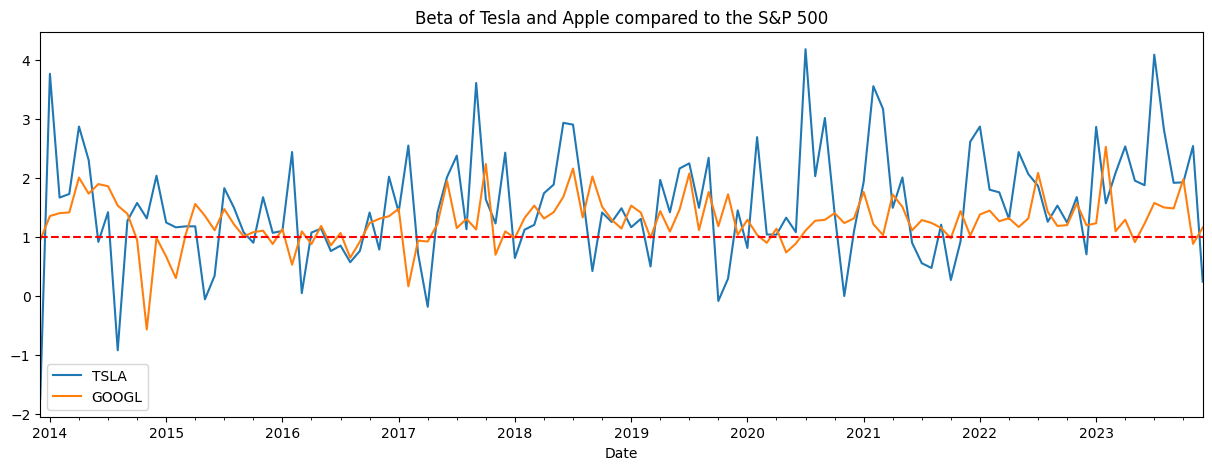

In [9]:
beta_plot = companies.performance.get_beta(period="monthly").plot(
    figsize=(15, 5), title="Beta of Tesla and Apple compared to the S&P 500"
)
beta_plot.axhline(y=1.0, color="red", linestyle="--")

<Axes: title={'center': 'Maximum Drawdown for each Quarter'}>

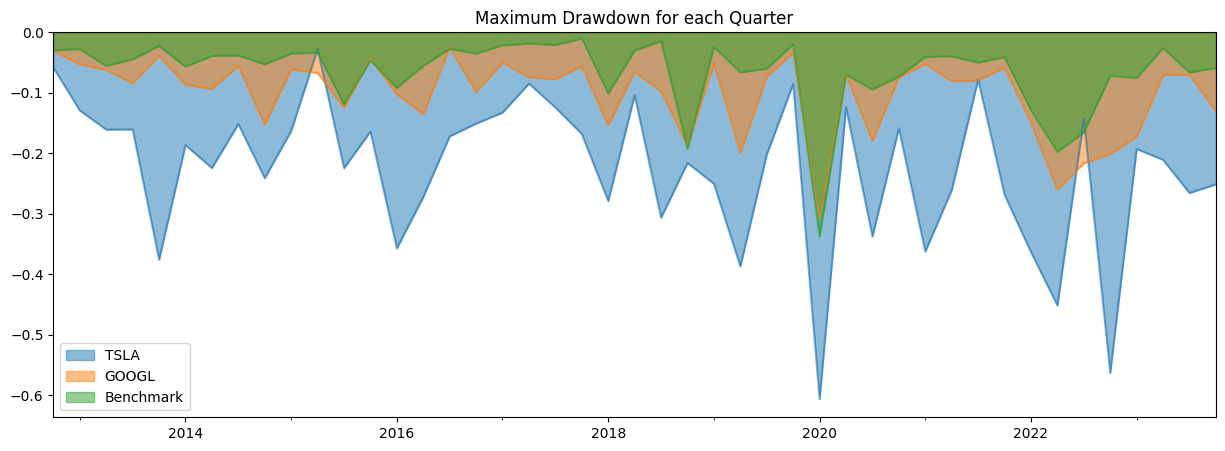

In [10]:
companies.risk.get_maximum_drawdown(period="quarterly").plot.area(
    figsize=(15, 5), title="Maximum Drawdown for each Quarter", stacked=False
)

And lastly, the historical data can be viewed which includes OHLC, Volume, Dividends, Volatility and (Cumulative) Returns.

In [11]:
companies.get_historical_data()

Open                     High                      Low          \
             TSLA   GOOGL Benchmark   TSLA   GOOGL Benchmark   TSLA   GOOGL   
Date                                                                          
2013-12-06  9.434 26.7715    180.67 9.4993 26.7768    181.11 9.0867 26.5285   
2013-12-09 9.1333 26.8016    181.47 9.4467 27.0848    181.67 8.9473 26.7272   
2013-12-10 9.3367 26.9307    180.98 9.7247 27.3351    181.36  9.324 26.9182   
2013-12-11 9.4587 27.2122    180.82 9.5367 27.3103    180.85 9.2993 26.9062   
2013-12-12 9.3133 27.0163    178.64 9.8827 27.1006    178.86 9.2353 26.7518   
...           ...     ...       ...    ...     ...       ...    ...     ...   
2023-11-28 236.68  136.08    454.08  247.0  137.25    456.27 234.01  135.42   
2023-11-29 249.21  137.57    457.15 252.75  138.29    458.32 242.76  134.84   
2023-11-30 245.14  135.05    455.48 245.22  135.55    456.76 236.91  131.28   
2023-12-01 233.14  131.86    455.77 240.19  132.11    459.65  231.9  130.67   
2023-12-04 233.14  131.86    455.77 236.99 130.025    456.27 234.92   128.9   

                      Close  ... Volatility Excess Return                    \
           Benchmark   TSLA  ...  Benchmark          TSLA   GOOGL Benchmark   
Date                         ...                                              
2013-12-06    180.15 9.1573  ...      0.011        -0.051 -0.0169   -0.0176   
2013-12-09    181.16   9.44  ...      0.011        0.0023 -0.0209   -0.0261   
2013-12-10    180.64 9.4793  ...      0.011       -0.0238  -0.022   -0.0316   
2013-12-11     178.5   9.31  ...      0.011       -0.0463 -0.0352   -0.0396   
2013-12-12    177.76 9.8313  ...      0.011        0.0272 -0.0356   -0.0321   
...              ...    ...  ...        ...           ...     ...       ...   
2023-11-28     453.5 246.72  ...      0.011        0.0017 -0.0376   -0.0424   
2023-11-29     454.2 244.14  ...      0.011       -0.0532 -0.0588   -0.0434   
2023-11-30    453.34 240.08  ...      0.011       -0.0601 -0.0617   -0.0396   
2023-12-01    455.16 238.83  ...      0.011       -0.0475 -0.0474   -0.0364   
2023-12-04    455.51 236.87  ...      0.011       -0.0509 -0.0619   -0.0489   

           Excess Volatility                  Cumulative Return         \
                        TSLA  GOOGL Benchmark              TSLA  GOOGL   
Date                                                                     
2013-12-06            0.0366 0.0198    0.0142               1.0    1.0   
2013-12-09            0.0366 0.0198    0.0142            1.0309 1.0077   
2013-12-10            0.0366 0.0198    0.0142            1.0352 1.0138   
2013-12-11            0.0366 0.0198    0.0142            1.0167 1.0069   
2013-12-12            0.0366 0.0198    0.0142            1.0736 1.0001   
...                      ...    ...       ...               ...    ...   
2023-11-28            0.0366 0.0198    0.0142           26.9423 5.1245   
2023-11-29            0.0366 0.0198    0.0142           26.6606 5.0419   
2023-11-30            0.0366 0.0198    0.0142           26.2172   4.95   
2023-12-01            0.0366 0.0198    0.0142           26.0807  4.925   
2023-12-04            0.0366 0.0198    0.0142           25.8667 4.8305   

                      
           Benchmark  
Date                  
2013-12-06       1.0  
2013-12-09    1.0025  
2013-12-10     0.999  
2013-12-11    0.9877  
2013-12-12    0.9845  
...              ...  
2023-11-28    3.0166  
2023-11-29    3.0145  
2023-11-30    3.0263  
2023-12-01    3.0442  
2023-12-04    3.0255  

[2515 rows x 36 columns]

Note that it is possible that your dataset doesn't cover all financial statement items if your normalization files are incomplete. This will become apparent when some ratios can not be calculated.

In [12]:
# Missing column returns an empty series
display(companies.ratios.get_debt_to_assets_ratio())

# Missing column skips the ratio in the total overview
display(companies.ratios.collect_profitability_ratios())

There is an index name missing in the provided financial statements. This is 'Total Debt'. This is required for the function (get_debt_to_assets_ratio) to run. Please fill this column to be able to calculate the ratios.


Series([], dtype: object)

There is an index name missing in the provided financial statements. This is 'Depreciation and Amortization'. This is required for the function (get_interest_coverage_ratio) to run. Please fill this column to be able to calculate the ratios.
There is an index name missing in the provided financial statements. This is 'Dividends Paid'. This is required for the function (get_return_on_invested_capital) to run. Please fill this column to be able to calculate the ratios.


2019   2020   2021   2022
GOOGL Gross Margin                                 0.5558 0.5358 0.5694 0.5538
      Operating Margin                              0.222 0.2259 0.3055 0.2646
      Net Profit Margin                            0.2122 0.2206 0.2951  0.212
      Income Before Tax Profit Margin              0.2448 0.2634 0.3522 0.2522
      Effective Tax Rate                           0.1333 0.1625  0.162 0.1592
      Return on Assets (ROA)                          NaN 0.1352  0.224 0.1655
      Return on Equity (ROE)                          NaN   0.19 0.3207 0.2362
      Return on Capital Employed (ROCE)            0.1722 0.1835 0.3087 0.2422
      Return on Tangible Assets                       NaN 0.1045 0.1715  0.127
      Income Quality Ratio                         1.5875 1.6172 1.2054 1.5256
      Net Income per EBT                           0.8667 0.8375  0.838 0.8408
      Free Cash Flow to Operating Cash Flow Ratio  0.5681 0.6579 0.7312 0.6559
      EBT to EBIT Ratio                            0.9975 0.9972 0.9962  0.995
      EBIT to Revenue                              0.2454 0.2642 0.3535 0.2535
TSLA  Gross Margin                                 0.1656 0.2102 0.2528  0.256
      Operating Margin                             0.0033 0.0632 0.1207 0.1698
      Net Profit Margin                           -0.0351 0.0219 0.1025 0.1545
      Income Before Tax Profit Margin             -0.0271 0.0366 0.1178 0.1684
      Effective Tax Rate                          -0.1654  0.253 0.1102 0.0825
      Return on Assets (ROA)                          NaN  0.016 0.0966 0.1742
      Return on Equity (ROE)                          NaN 0.0478 0.2106  0.336
      Return on Capital Employed (ROCE)           -0.0028 0.0456 0.1553   0.25
      Return on Tangible Assets                       NaN 0.0097  0.063 0.1177
      Income Quality Ratio                          -2.79  8.613 2.0832 1.1702
      Net Income per EBT                           1.1463 0.7026 0.8876 0.9175
      Free Cash Flow to Operating Cash Flow Ratio  0.4025 0.4545 0.3029 0.5129
      EBT to EBIT Ratio                           11.2239 0.5676 0.9437 0.9863
      EBIT to Revenue                             -0.0027 0.0549 0.1224 0.1707

It is also possible to still include your Financial Modeling Prep key and run the related functionality.

In [13]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    api_key="FMP_KEY",
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Analyst Estimates from Financial Modeling Prep
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]


date                                         2013          2014          2015  \
TSLA  Estimated Revenue Low          1165044612.0  3096377368.0  3031073263.0   
      Estimated Revenue High         1506700929.0  4004408595.0  3919953669.0   
      Estimated Revenue Average      1318450909.0  3504090326.0  3430187356.0   
      Estimated EBITDA Low             59070824.0    67202937.0 -1790598161.0   
      Estimated EBITDA High            91129873.0   116549325.0 -1193732107.0   
      Estimated EBITDA Average         75100349.0    91876131.0 -1492165134.0   
      Estimated EBIT Low              -88039913.0  -432667751.0 -3590749718.0   
      Estimated EBIT High             -58693274.0  -288445167.0 -2393833145.0   
      Estimated EBIT Average          -73366594.0  -360556459.0 -2992291432.0   
      Estimated Net Income Low       -146837816.0  -707480721.0 -4429783647.0   
      Estimated Net Income High       -90393210.0  -471653814.0 -2953189097.0   
      Estimated Net Income Average   -118615513.0  -589567268.0 -3691486372.0   
      Estimated SGA Expense Low       269102394.0   945468432.0   286025570.0   
      Estimated SGA Expense High      403653592.0  1418202648.0   369904283.0   
      Estimated SGA Expense Average   336377993.0  1181835540.0   323687753.0   
      Estimated EPS Average                0.0199       -0.0177       -0.0621   
      Estimated EPS High                   0.0279       -0.0248        -0.087   
      Estimated EPS Low                    0.0142       -0.0126       -0.0443   
      Number of Analysts                     53.0          51.0          49.0   
GOOGL Estimated Revenue Low         53518404495.0 65268485936.0 69863055218.0   
      Estimated Revenue High        57204913103.0 69764375481.0 74675432509.0   
      Estimated Revenue Average     55584303166.0 67787957128.0 72559884361.0   
      Estimated EBITDA Low          15665803940.0 18780939496.0 19198264630.0   
      Estimated EBITDA High         23498705910.0 28171409246.0 28797396948.0   
      Estimated EBITDA Average      19582254925.0 23476174371.0 23997830789.0   
      Estimated EBIT Low            11155195557.0 13552007555.0 14966768712.0   
      Estimated EBIT High           16732793336.0 20328011335.0 22450153068.0   
      Estimated EBIT Average        13943994447.0 16940009445.0 18708460890.0   
      Estimated Net Income Low      10193364145.0 11617824069.0 12621305194.0   
      Estimated Net Income High     15290046219.0 17426736105.0 18931957791.0   
      Estimated Net Income Average  12741705182.0 14522280087.0 15776631493.0   
      Estimated SGA Expense Low     10316882529.0 11489239912.0 14996937776.0   
      Estimated SGA Expense High    15475323794.0 17233859867.0 22495406665.0   
      Estimated SGA Expense Average 12896103162.0 14361549890.0 18746172221.0   
      Estimated EPS Average                  1.11          1.31          1.44   
      Estimated EPS High                   1.2188        1.4384        1.5811   
      Estimated EPS Low                    0.9598        1.1328        1.2452   
      Number of Analysts                     55.0          53.0          51.0   

date                                         2016           2017  \
TSLA  Estimated Revenue Low          3563669919.0  10424883038.0   
      Estimated Revenue High         4608737488.0  13482042489.0   
      Estimated Revenue Average      4032913241.0  11797570986.0   
      Estimated EBITDA Low            813638881.0    132981646.0   
      Estimated EBITDA High          1334534318.0    337625225.0   
      Estimated EBITDA Average       1074086600.0    235303436.0   
      Estimated EBIT Low             -429111338.0  -1797932097.0   
      Estimated EBIT High            -115781580.0  -1198621397.0   
      Estimated EBIT Average         -272446459.0  -1498276747.0   
      Estimated Net Income Low       -604415639.0  -2181290577.0   
      Estimated Net Income High      -359430847.0  -1454193717.0   
      Estimated Net Inco